<a href="https://colab.research.google.com/github/MarceloZanguettin/IA_SVM/blob/main/Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [ ]:
# Carregar o dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
print("Features: ", iris.feature_names)
print("Labels: ", iris.target_names)
print("Size: ", iris.data.shape)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']
Size:  (150, 4)


In [ ]:
# Redução para duas dimensões
X=iris.data[:,:2]
print(X.shape)

(150, 2)


In [ ]:
# Ajustar o Modelo SVM
svc = svm.SVC(kernel='linear', random_state=None)
svc.fit(X,y)

SVC(kernel='linear')

In [ ]:
# Preparar o ambiente do grafico
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

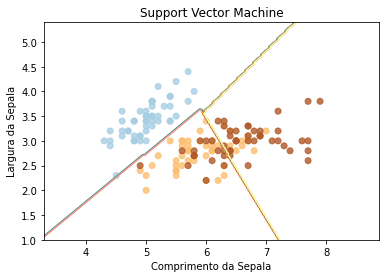

In [ ]:
# Grafico com os Hiperplanos Separadores
plt.subplot(1,1,1)
z =  svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contour(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, alpha=0.8)
plt.xlabel("Comprimento da Sepala")
plt.ylabel("Largura da Sepala")
plt.xlim(xx.min(), xx.max())
plt.title("Support Vector Machine")
plt.show()

In [ ]:
# Importando Bibliotecas para avaliação
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Separar o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state=0)

# Configurando o modelo
clf = svm.SVC(kernel='linear', random_state=None, probability=True)

# Ajustar o Modelo
clf.fit(X_train, y_train)

# Fazer predições
y_pred = clf.predict(X_test)

In [ ]:
# Avaliar o Modelo
print("Acuracia:", metrics.accuracy_score(y_test, y_pred))
print("Precisão:", metrics.precision_score(y_test, y_pred, average=None))
print("Revocação:", metrics.recall_score(y_test, y_pred, average=None))

Acuracia: 0.9777777777777777
Precisão: [1.         1.         0.91666667]
Revocação: [1.         0.94444444 1.        ]
